# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [65]:
import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.dropna(subset=['bill_depth_mm'], inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Need to dummify species, island, sex

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

X = penguins.drop('bill_depth_mm', axis=1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


num = ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'year']
num_transform = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scalar", StandardScaler())
])
cat = ['species', 'island', 'sex']
cat_transform = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("dummy", OneHotEncoder())
])

ct = ColumnTransformer([
    ('num', num_transform, num),
    ("cat", cat_transform, cat)
])

pipeline = Pipeline([
    ("preprocessor", ct),
    ("regressor", LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.6250082668032524


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


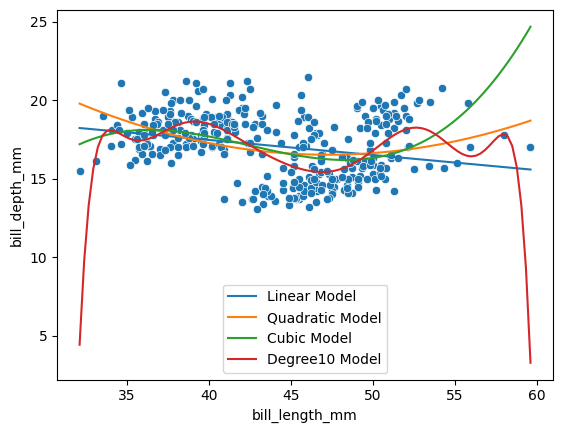

In [74]:
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import numpy as np

X = penguins[['bill_length_mm']]
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

models = {
    "Linear": Pipeline([
        ("scalar", StandardScaler()),
        ("linear", LinearRegression())
    ]),
    "Quadratic": Pipeline([
        ("scalar", StandardScaler()),
        ("poly", PolynomialFeatures(degree=2)),
        ("linear", LinearRegression())
    ]),
    "Cubic": Pipeline([
        ("scalar", StandardScaler()),
        ("poly", PolynomialFeatures(degree=3)),
        ("linear", LinearRegression())
    ]),
    "Degree10": Pipeline([
        ("scalar", StandardScaler()),
        ("poly", PolynomialFeatures(degree=10)),
        ("linear", LinearRegression())
    ])
}

sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=penguins)
x_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_plot = model.predict(x_plot)
    sns.lineplot(x=x_plot.squeeze(), y=y_plot, label=f'{name} Model')

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of the models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Underfitting: none\
Overfitting: Degree 10 model (too many changes in concavity)\
Best fit: Either linear or cubic (data is pretty spaced out evenly so linear might work well, and cubic tends to share the most similar curve to the trend of the data points)